In [1]:
# Importing Libraries
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list)
    if isinstance(skill_list, str) else skill_list
)

In [2]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [3]:
df_exploded = df_skills.explode('job_skills')

df_exploded

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


In [4]:
df_exploded.value_counts('job_skills')

job_skills
python     3
airflow    1
aws        1
excel      1
r          1
sql        1
Name: count, dtype: int64

<Axes: xlabel='job_skills'>

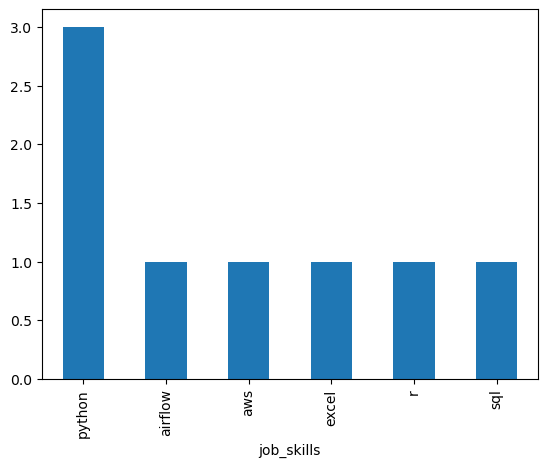

In [5]:
df_exploded.value_counts('job_skills').plot(kind = "bar")

In [6]:
df[['job_title_short', 'job_skills']].head(10)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."
5,Data Engineer,"[python, sql, gcp]"
6,Senior Data Engineer,"[sql, python, java, sql server, gcp, bigquery,..."
7,Data Engineer,"[sql, nosql, gcp, azure, aws, bigquery, databr..."
8,Business Analyst,"[excel, powerpoint, power bi]"
9,Data Scientist,"[sql, python, r, mongodb, mongodb, sql server,..."


In [10]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

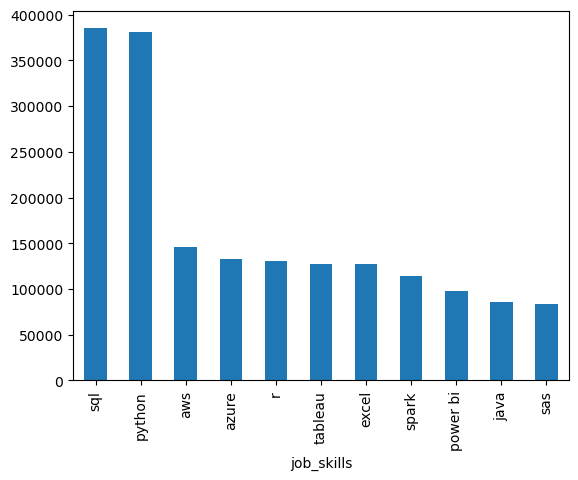

In [13]:
df_exploded['job_skills'].value_counts().head(11).plot(kind = 'bar')

In [30]:
skill_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

type(skill_count)   #we need to convert it back to DataFrames   

pandas.core.series.Series

In [44]:
df_skill_count = skill_count.reset_index(name = "skill count")

df_skill_count = df_skill_count.sort_values(by='skill count', ascending=False)
df_skill_count


,job_title_short,job_skills,skill count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


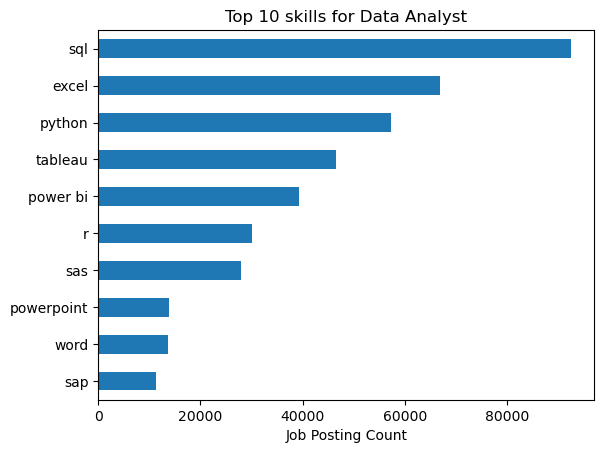

In [51]:
job_title = "Data Analyst"
top_skills = 10

df_skill_final = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind = 'barh', x = 'job_skills', y = 'skill count')
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills} skills for {job_title}")
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()